In [32]:
import numpy as np
import cv2
import copy
import matplotlib.pyplot as plt

Загрузка изображения

In [33]:
image = cv2.imread('assets/sar_3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

1) Наиболее протяженный участок
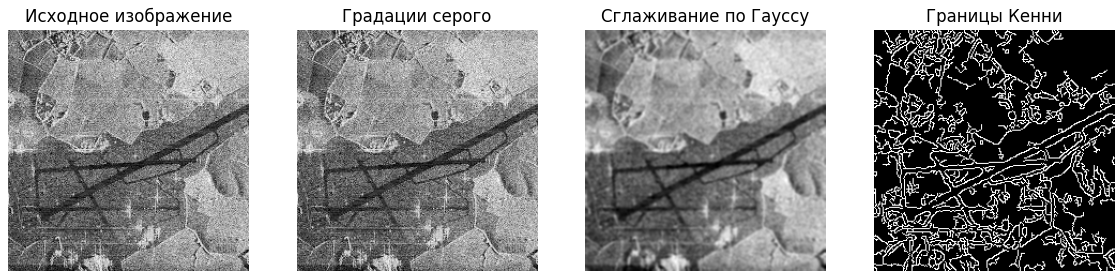

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

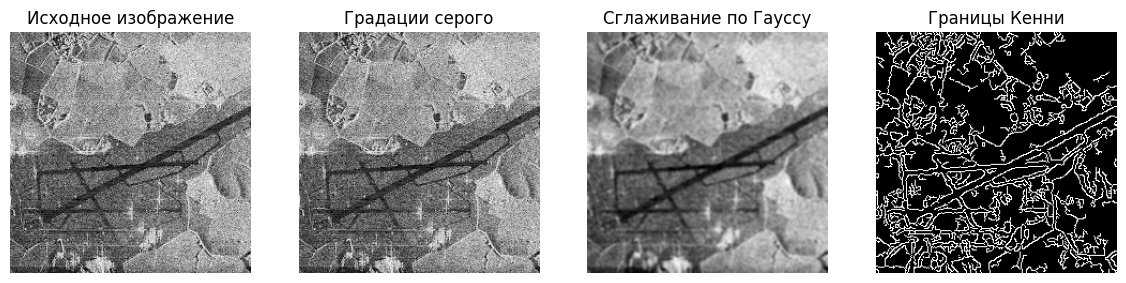

In [34]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)
canny = cv2.Canny(blur, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(canny, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

max_length = 0
longest_line = None

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        if length > max_length:
            max_length = length
            longest_line = line

plt.figure(figsize=(18, 6))

plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(gray, cmap='gray')
plt.title('Градации серого')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(blur, cmap='gray')
plt.title('Сглаживание по Гауссу')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(canny, cmap='gray')
plt.title('Границы Кенни')
plt.axis('off')

Результат с отображением самой длинной линии
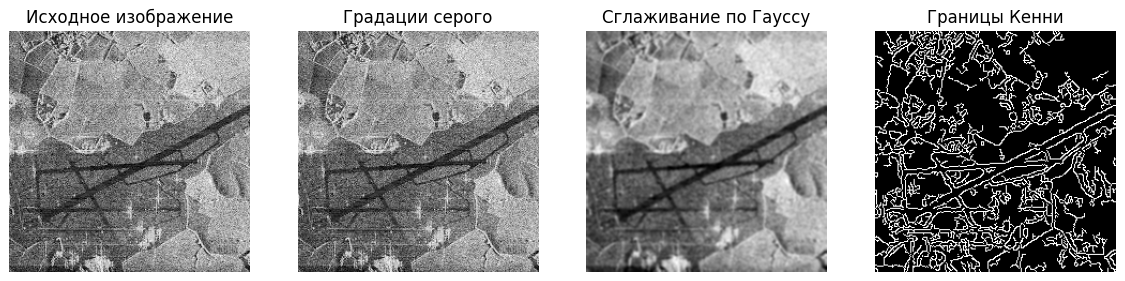

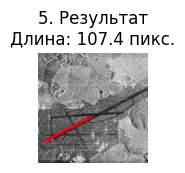

- Наиболее протяженный участок: 107.35 пикселей
- Угол наклона: -27.8°


In [35]:
result = image.copy()
if longest_line is not None:
    x1, y1, x2, y2 = longest_line[0]
    cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 4)

plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title(f'5. Результат\nДлина: {max_length:.1f} пикс.')
plt.axis('off')

plt.tight_layout()
plt.show()

if longest_line is not None:
    x1, y1, x2, y2 = longest_line[0]
    angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))

    print(f"- Наиболее протяженный участок: {max_length:.2f} пикселей")
    print(f"- Угол наклона: {angle:.1f}°")
else:
    print("Линии не найдены")


2. Алгоритмы бинаризации

In [36]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

bin_img = copy.deepcopy(image_gray)
T = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

Точечная бинаризация

In [37]:
bin_img = copy.deepcopy(image_gray)
T = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

Бинаризация Отсу

In [38]:
_, th2 = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

Адаптивная бинаризация

In [39]:
th3 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY, 71, 21)

Визуализация методов бинаризации

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

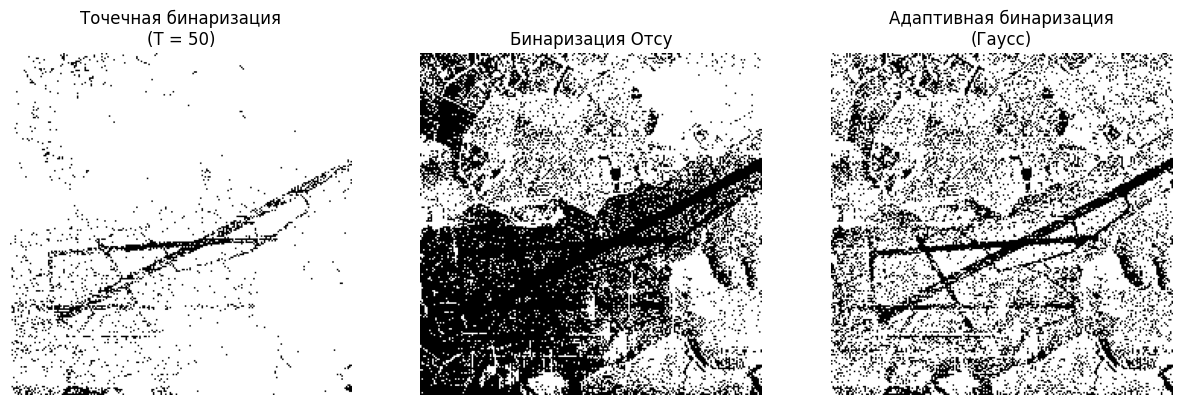

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(bin_img, cmap='gray')
plt.title('Точечная бинаризация\n(T = 50)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(th2, cmap='gray')
plt.title('Бинаризация Отсу')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(th3, cmap='gray')
plt.title('Адаптивная бинаризация\n(Гаусс)')
plt.axis('off')

Выделение дорожной полосы

In [41]:
def extract_road(binary_img, original_img):
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        road_contour = max(contours, key=cv2.contourArea)
        result = original_img.copy()
        cv2.drawContours(result, [road_contour], -1, (0, 255, 0), 2)
        return result

    return original_img

Выделение дорожных полос для каждого метода

In [42]:
result1 = extract_road(bin_img, image)
result2 = extract_road(th2, image)
result3 = extract_road(th3, image)

Визуализация выделенных дорожных полос

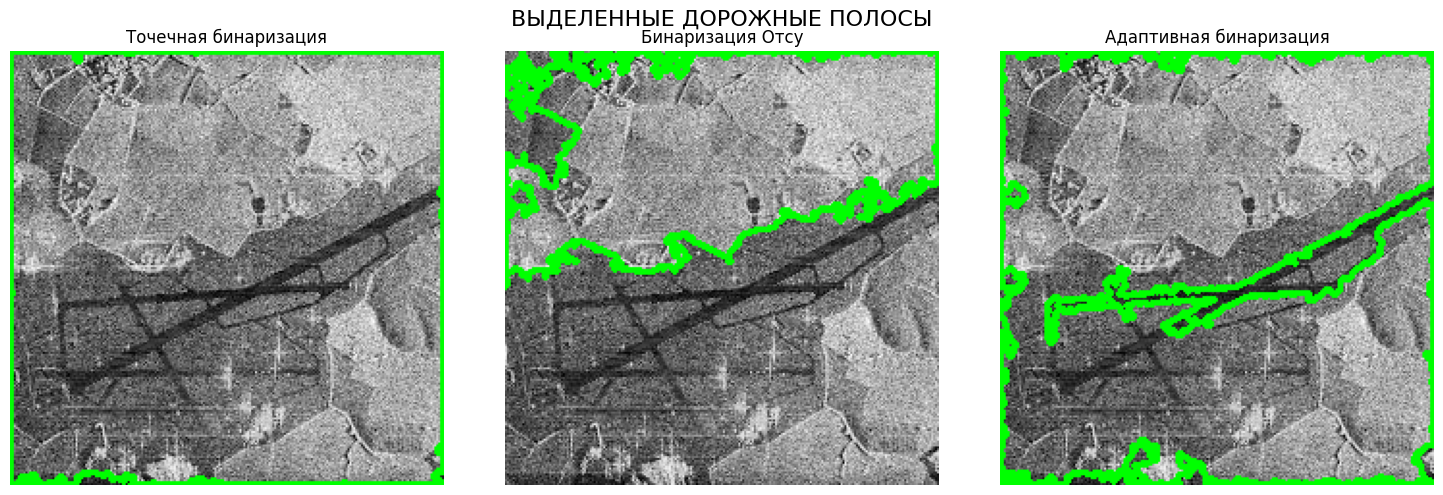

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.title('Точечная бинаризация')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title('Бинаризация Отсу')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result3, cv2.COLOR_BGR2RGB))
plt.title('Адаптивная бинаризация')
plt.axis('off')

plt.suptitle("ВЫДЕЛЕННЫЕ ДОРОЖНЫЕ ПОЛОСЫ", fontsize=16)
plt.tight_layout()
plt.show()